# Labour Portfolios

### Input Variables:

$G$ Number of different heterogenous tenure workes  
$N$ Max Number of Workers hired during one period  
  
$N_G$ Maximum Number of Workers in last Tenure Group

$\textit{f}$  Function used to Create the Labour Portfolio

### Output Variables:

$\mathbb{L}$ Matrix with $S_L$ Labour Portfolio States with $G$ different types of workers 

## Function:

As of: 28/04/2015

In [1]:
function LabourPortfolio(G::Int,N::Int,N_G::Int,f::Function)
    
    """Create all the Labour Portfolios
    a firm can have given the Economy

    Parameters
    ----------
    G  : Generations
    N  : Max Number of Workers hired in a Period 
    N_G: Maximum Number of Workers in last Tenure Group
    f  : Function used to Create the Labour Portfolio
    
    Output
    ----------
    L    : Matrix with S_L Labour Portfolio States with G different types of workers
    """
    
    L_i=fill(N,G);
    
    L_i[G]=N_G;
    
    L=f(L_i);                 # 100%
    
    return L
    
end

LabourPortfolio (generic function with 1 method)

In [2]:
61/71

0.8591549295774648

## Growing Size

$G$

In [3]:
import LabourDP

N=3;
N_G=12;

## Time

Max Size and Sample Size

In [4]:
Ms=11;
Ss=1;

### Test

In [5]:
# Warm Up Run
G=10;
f=LabourDP.fPort(G);
LabourPortfolio(G,N,N_G,f);#

t=[1.0:Ms];
b=[1.0:Ss];

for i=1:Ms
    
    for j=1:Ss
        
        f=LabourDP.fPort(i)
        a=@elapsed LabourPortfolio(i,N,N_G,f)
        b[j]=a;
        
    end
    
    t[i]=minimum(b);
    
end

### Plot Result

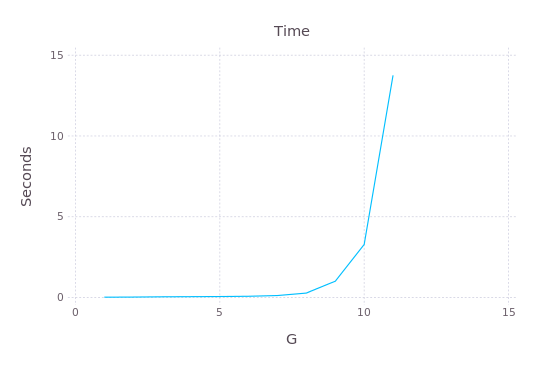

In [6]:
using Gadfly

plot(x=[1:Ms], y=t,Guide.xlabel("G"),Guide.ylabel("Seconds"),Guide.title("Time"), Geom.line)

## Memory

Max Size and Sample Size

In [7]:
Ms=11;
Ss=1;

### Test

In [8]:
# Warm Up Run
G=10;
f=LabourDP.fPort(G);
LabourPortfolio(G,N,N_G,f);  #

t=[1.0:Ms];
b=[1.0:Ss];

for i=1:Ms
    
    for j=1:Ss
        
        f=LabourDP.fPort(i);
        a=@allocated LabourPortfolio(i,N,N_G,f)
        b[j]=a/10^9.0;
        
    end
    
    t[i]=minimum(b);
    
end

### Plot Result

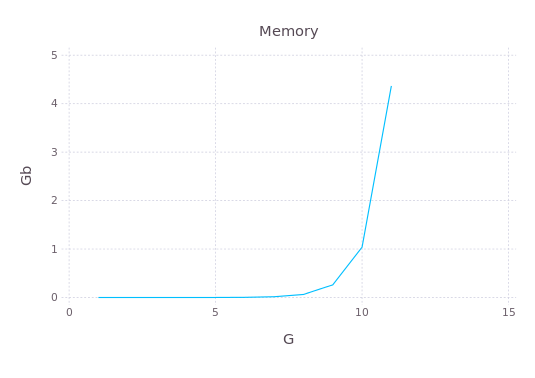

In [9]:
plot(x=[1:Ms], y=t,Guide.xlabel("G"),Guide.ylabel("Gb"),Guide.title("Memory"), Geom.line)

## Profile

In [10]:
G=10;
N=3;
N_G=10;
f=LabourDP.fPort(G);

Sample Size

In [11]:
Rep=1;

In [12]:
Profile.clear()
@profile (for i=1:Rep;LabourPortfolio(G,N,N_G,f);end)
Profile.print()

3596 task.jl; anonymous; line: 340
 3596 .../IJulia/src/IJulia.jl; eventloop; line: 123
  3596 ...rc/execute_request.jl; execute_request_0x535c5df2; line: 160
   3596 loading.jl; include_string; line: 97
    3595 profile.jl; anonymous; line: 2
     3595 In[1]; LabourPortfolio; line: 22
      58   ./inference.jl; typeinf_ext; line: 1216
       42 ./inference.jl; typeinf; line: 1409
        32 ./inference.jl; abstract_interpret; line: 1090
         32 ./inference.jl; abstract_eval; line: 935
          1  ./inference.jl; abstract_eval_call; line: 878
           1 ./inference.jl; abstract_eval_arg; line: 866
            1 ./inference.jl; abstract_eval; line: 935
             1 ./inference.jl; abstract_eval_call; line: 883
              1 ./inference.jl; isconstantfunc; line: 591
               1 ./inference.jl; _iisconst; line: 63
          30 ./inference.jl; abstract_eval_call; line: 903
           30 ./inference.jl; abstract_call; line: 819
            2  ./inference.jl; abstract_call_gf